# Unsupervised and supervised learning techniques on 100 stocks and related tweets

## Part 1: KDD Analysis

The goal of this analysis is to evaluate the riskness of the stocks using daily Open/High/Low/Close data combined with various indicators such as P/E, debt, ..., using clustering algorithms to identify stocks with similar levels of risk.

### Initial Exploratory Analysis

We firstly need to import the libraries and modules that we will use during our analysis.

In [10]:
# !pip install nltk
# !pip install textblob

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import pickle
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Let's start importing the datasets and visualizing their structure

In [11]:
df_top100info = pd.read_csv("./datasets/top100info.csv")
df_top100info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 101 entries, 0 to VYM
dtypes: float64(11), object(90)
memory usage: 47.5+ KB


In [12]:
df_top100info

,0,AAPL,AMZN,MSFT,SNAP,HOOD,WMT,GOOG,PTON,CPRX,...,ZM,CRM,FUBO,BND,RITM,SPHD,QS,VEA,IVR,VYM
0,Market Cap (intraday),2.61T,1.05T,2.17T,16.70B,8.97B,406.50B,1.37T,3.95B,1.84B,...,21.11B,192.55B,230.66M,NaN,3.70B,NaN,3.21B,NaN,446.26M,NaN
1,Enterprise Value,2.66T,1.12T,2.13T,16.94B,-4.48B,456.80B,1.28T,5.49B,1.54B,...,15.80B,194.13B,336.37M,NaN,NaN,NaN,2.25B,NaN,NaN,NaN
2,Trailing P/E,27.96,NaN,32.40,NaN,NaN,35.32,23.45,NaN,23.17,...,211.32,916.90,NaN,NaN,4.33,NaN,NaN,NaN,1.10,NaN
3,Forward P/E,27.86,63.69,26.95,NaN,NaN,24.75,19.80,NaN,11.59,...,17.33,27.03,NaN,NaN,5.61,NaN,NaN,NaN,1.99,NaN
4,PEG Ratio (5 yr expected),2.78,2.30,2.19,NaN,NaN,4.21,1.17,NaN,NaN,...,2.69,1.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Price/Sales (ttm),6.88,2.02,10.71,3.69,6.48,0.67,4.98,1.26,9.04,...,4.98,6.12,0.20,NaN,1.06,NaN,NaN,NaN,0.87,NaN
6,Price/Book (mrq),45.93,7.16,11.85,6.47,1.29,5.30,5.35,129.45,6.11,...,3.40,3.30,0.56,NaN,0.65,NaN,2.43,NaN,0.88,NaN
7,Enterprise Value/Revenue,6.88,2.17,10.44,3.68,-3.30,0.75,4.53,1.80,7.20,...,3.60,6.19,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Enterprise Value/EBITDA,20.81,29.10,21.58,-14.39,5.09,15.18,14.63,-2.17,14.96,...,48.20,34.40,-0.90,NaN,NaN,NaN,-6.03,NaN,NaN,NaN
9,Beta (5Y Monthly),1.30,1.25,0.92,1.20,NaN,0.49,1.09,1.95,1.16,...,-0.22,1.21,2.45,1.0,1.78,0.74,5.27,1.09,1.55,0.77


As we can see, this dataset contains information on 60 financial indicators from 100 companies. The dataset looks well structured and doesn't seem to need cleaning.

Let's check the number of null values.

In [13]:
df_top100info.isnull().sum()

0        0
AAPL     1
AMZN     7
MSFT     1
SNAP    12
        ..
SPHD    59
QS      18
VEA     59
IVR     10
VYM     59
Length: 101, dtype: int64

Small-cap companies seem to have an higher number of missing indicators.

Let's now analyse the other dataset.

In [14]:
df_top100 = pd.read_csv("./datasets/top100.csv")
df_top100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24849 entries, 0 to 24848
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      24849 non-null  int64  
 1   Unnamed: 0.6    12460 non-null  float64
 2   Unnamed: 0.5    7942 non-null   float64
 3   Unnamed: 0.4    4428 non-null   float64
 4   Unnamed: 0.3    1004 non-null   float64
 5   Unnamed: 0.2    753 non-null    float64
 6   Unnamed: 0.1    502 non-null    float64
 7   Unnamed: 0.1.1  251 non-null    float64
 8   Stock Name      24849 non-null  object 
 9   Date            24849 non-null  object 
 10  Open            24849 non-null  float64
 11  Close           24849 non-null  float64
 12  High            24849 non-null  float64
 13  Low             24849 non-null  float64
 14  Volume          24849 non-null  float64
dtypes: float64(12), int64(1), object(2)
memory usage: 2.8+ MB


In [15]:
df_top100

,Unnamed: 0,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0.1.1,Stock Name,Date,Open,Close,High,Low,Volume
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAPL,2022-01-10 05:00:00,169.0800,172.19,172.5000,168.1700,106754551.0
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,AAPL,2022-01-11 05:00:00,172.3200,175.08,175.1800,170.8200,76138312.0
2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,AAPL,2022-01-12 05:00:00,176.1200,175.53,177.1800,174.8200,74805173.0
3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,AAPL,2022-01-13 05:00:00,175.7800,172.19,176.6200,171.7900,84405760.0
4,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,AAPL,2022-01-14 05:00:00,171.3400,173.07,173.7800,171.0900,80440778.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24844,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VYM,2023-01-03 05:00:00,108.5200,108.02,108.8000,107.2000,2377721.0
24845,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VYM,2023-01-04 05:00:00,108.3200,108.94,109.5000,108.0300,7427816.0
24846,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VYM,2023-01-05 05:00:00,108.4881,108.39,108.7500,107.8209,1829917.0
24847,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VYM,2023-01-06 05:00:00,109.2900,110.77,111.0500,109.0900,1624080.0


The first 8 columns of the dataset seem to contain unspecified and mostly null data, let's discard them.

In [16]:
features = df_top100.columns[8:]
df_top100_cleaned = df_top100[features]
df_top100_cleaned

,Stock Name,Date,Open,Close,High,Low,Volume
0,AAPL,2022-01-10 05:00:00,169.0800,172.19,172.5000,168.1700,106754551.0
1,AAPL,2022-01-11 05:00:00,172.3200,175.08,175.1800,170.8200,76138312.0
2,AAPL,2022-01-12 05:00:00,176.1200,175.53,177.1800,174.8200,74805173.0
3,AAPL,2022-01-13 05:00:00,175.7800,172.19,176.6200,171.7900,84405760.0
4,AAPL,2022-01-14 05:00:00,171.3400,173.07,173.7800,171.0900,80440778.0
...,...,...,...,...,...,...,...
24844,VYM,2023-01-03 05:00:00,108.5200,108.02,108.8000,107.2000,2377721.0
24845,VYM,2023-01-04 05:00:00,108.3200,108.94,109.5000,108.0300,7427816.0
24846,VYM,2023-01-05 05:00:00,108.4881,108.39,108.7500,107.8209,1829917.0
24847,VYM,2023-01-06 05:00:00,109.2900,110.77,111.0500,109.0900,1624080.0


This dataset contains daily open, close, high, low and volume values ​​for the 100 stocks from the previous dataset.

Let's try to visualize the trend of the first 10 stocks of the dataset.

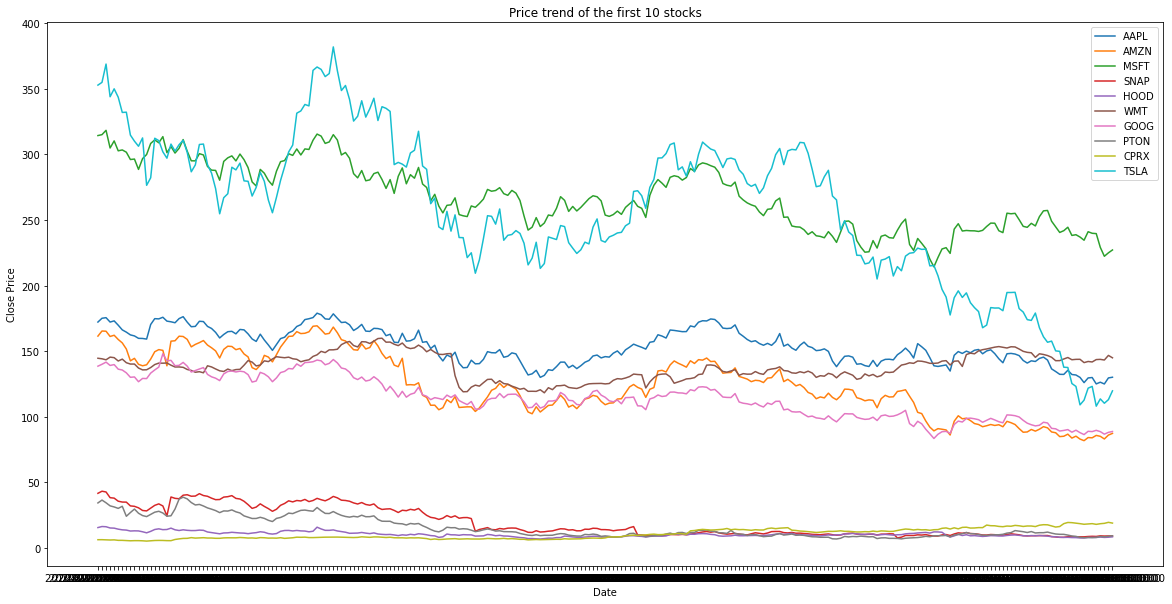

In [17]:
# select the first 10 stocks
stocks = df_top100_cleaned['Stock Name'].unique()[:10]

# create a lineplot for every stock selected
plt.figure(figsize=(20, 10))
for stock in stocks:
    data = df_top100_cleaned[df_top100_cleaned['Stock Name'] == stock]
    plt.plot(data["Date"], data['Close'], label=stock)

# add the legend to the plot
plt.legend()

# add labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Price trend of the first 10 stocks')

# show the plot
plt.show()

### Data Manipulation
An information that could be interesting for our analysis of the riskiness of stocks is the volatility, i.e. how much the price of a stock has changed in a given time interval, in our case daily.

Let's create a new column "volatility" in the OHLC dataset.

In [18]:
df_top100_cleaned["Volatility"] = (df_top100_cleaned["High"] - df_top100_cleaned["Low"]) / df_top100_cleaned["Open"]
df_top100_cleaned

,Stock Name,Date,Open,Close,High,Low,Volume,Volatility
0,AAPL,2022-01-10 05:00:00,169.0800,172.19,172.5000,168.1700,106754551.0,0.025609
1,AAPL,2022-01-11 05:00:00,172.3200,175.08,175.1800,170.8200,76138312.0,0.025302
2,AAPL,2022-01-12 05:00:00,176.1200,175.53,177.1800,174.8200,74805173.0,0.013400
3,AAPL,2022-01-13 05:00:00,175.7800,172.19,176.6200,171.7900,84405760.0,0.027478
4,AAPL,2022-01-14 05:00:00,171.3400,173.07,173.7800,171.0900,80440778.0,0.015700
...,...,...,...,...,...,...,...,...
24844,VYM,2023-01-03 05:00:00,108.5200,108.02,108.8000,107.2000,2377721.0,0.014744
24845,VYM,2023-01-04 05:00:00,108.3200,108.94,109.5000,108.0300,7427816.0,0.013571
24846,VYM,2023-01-05 05:00:00,108.4881,108.39,108.7500,107.8209,1829917.0,0.008564
24847,VYM,2023-01-06 05:00:00,109.2900,110.77,111.0500,109.0900,1624080.0,0.017934


Now we can group the various stocks and compute the mean of the values, in order to use the average volatility as part of the parameters to determine the riskness of the stocks.

In [19]:
df_top100_grouped = df_top100_cleaned.copy().groupby(["Stock Name"]).mean()
df_top100_grouped = df_top100_grouped[["Volatility"]]
df_top100_grouped

,Volatility
Stock Name,
AAL,0.045506
AAPL,0.027721
ABNB,0.048793
AMC,0.097717
AMD,0.048830
...,...
VYM,0.014782
WISH,0.087192
WMT,0.019650


Another interesting information could be the standard deviation of the closing prices and of the volumes of a stock.

In [20]:
df_std = df_top100_cleaned.copy().groupby(["Stock Name"]).std()
df_top100_grouped["Volume Standard Deviation"] = df_std[["Volume"]]
df_top100_grouped["Price Standard Deviation"] = df_std[["Close"]]
df_top100_grouped

,Volatility,Volume Standard Deviation,Price Standard Deviation
Stock Name,,,
AAL,0.045506,1.345385e+07,2.064661
AAPL,0.027721,2.364205e+07,13.244256
ABNB,0.048793,3.668290e+06,27.262229
AMC,0.097717,2.851603e+07,5.650513
AMD,0.048830,2.820410e+07,20.360618
...,...,...,...
VYM,0.014782,1.171254e+06,4.638676
WISH,0.087192,2.848659e+05,19.275580
WMT,0.019650,4.601939e+06,9.976401


Let's visualize this data with some charts.

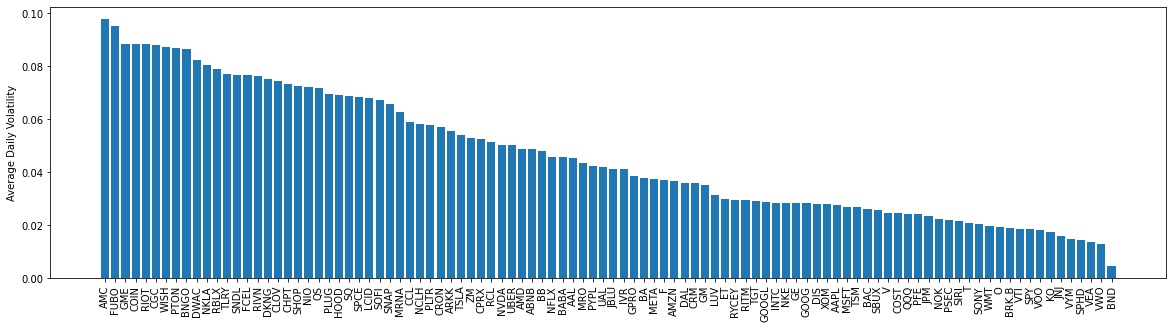

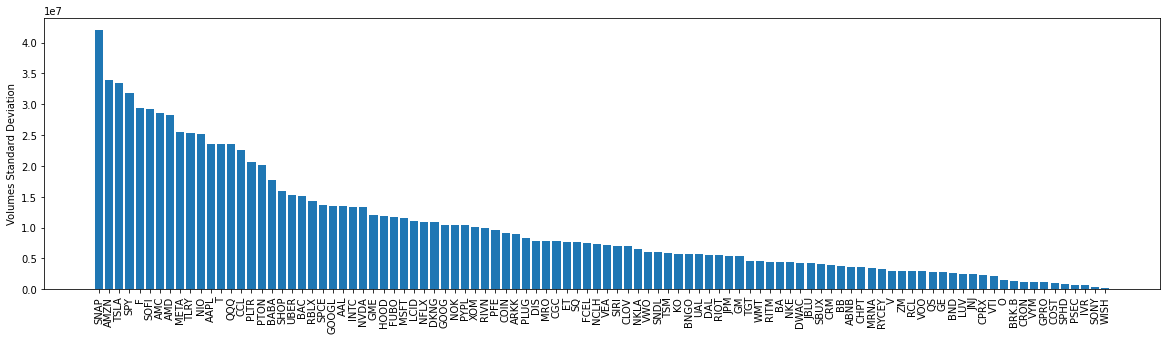

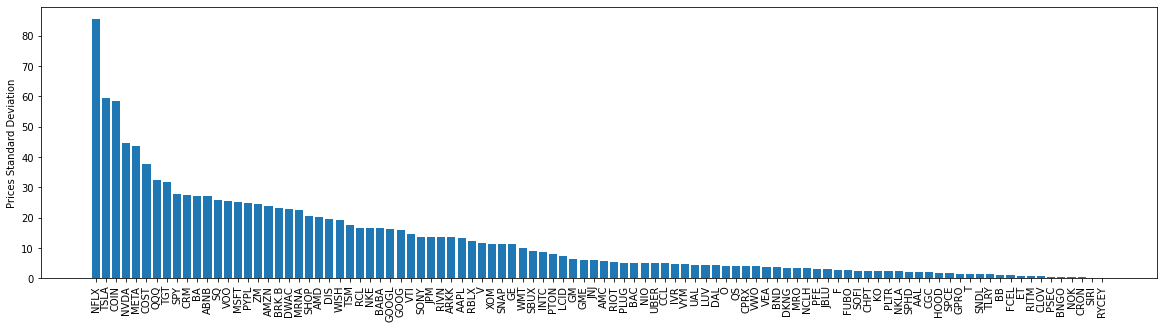

In [21]:
df_top100_grouped = df_top100_grouped.sort_values("Volatility", ascending=False)
plt.figure(figsize = (20, 5))
plt.bar(df_top100_grouped.index, df_top100_grouped["Volatility"])
plt.xticks(rotation=90)
plt.ylabel("Average Daily Volatility")
plt.show()

df_top100_grouped = df_top100_grouped.sort_values("Volume Standard Deviation", ascending=False)
plt.figure(figsize = (20, 5))
plt.bar(df_top100_grouped.index, df_top100_grouped["Volume Standard Deviation"])
plt.xticks(rotation=90)
plt.ylabel("Volumes Standard Deviation")
plt.show()

df_top100_grouped = df_top100_grouped.sort_values("Price Standard Deviation", ascending=False)
plt.figure(figsize = (20, 5))
plt.bar(df_top100_grouped.index, df_top100_grouped["Price Standard Deviation"])
plt.xticks(rotation=90)
plt.ylabel("Prices Standard Deviation")
plt.show()

Now we can combine this dataset with the other dataset. The information we are going to use as indicators of the riskness of a stock are:

- **Trailing P/E**: high values (> 13-15) could mean that the company is overrated and it could have big price swings
- **Total Debt/Equity (mrq)**: high debt ratio could mean that the company is investing a lot or has a lot of expenses, so could be more impredictible in the future
- **Beta (5Y Monthly)**: measure of the systematic risk of a stock compared to the market as a whole (usually SP500). Values < 1.0 means that the stock is less volatile than the market, and vice versa.
- **52-Week Change 3**: range designated by the highest and lowest price of a stock over the previous year.

Let's pick those information and join them with our dataframe.

Firstly, we need to transpose the dataframe to match the structure of the other we used.

In [22]:
#transpose the dataset, flipping the rows and columns
df_top100info_t = df_top100info.T.copy()

#select the first row of the transposed dataset, which contains the original column names
#this row is assigned to a new variable
new_header = df_top100info_t.iloc[0]

# remove the first row of the transposed data, which contains the original column names
df_top100info_t = df_top100info_t[1:]

#the columns attribute of the data is assigned the new_header variable, which contains the renamed column names.
df_top100info_t.columns = new_header
df_top100info_t

0,Market Cap (intraday),Enterprise Value,Trailing P/E,Forward P/E,PEG Ratio (5 yr expected),Price/Sales (ttm),Price/Book (mrq),Enterprise Value/Revenue,Enterprise Value/EBITDA,Beta (5Y Monthly),...,Diluted EPS (ttm),Quarterly Earnings Growth (yoy),Total Cash (mrq),Total Cash Per Share (mrq),Total Debt (mrq),Total Debt/Equity (mrq),Current Ratio (mrq),Book Value Per Share (mrq),Operating Cash Flow (ttm),Levered Free Cash Flow (ttm)
AAPL,2.61T,2.66T,27.96,27.86,2.78,6.88,45.93,6.88,20.81,1.30,...,5.90,-13.40%,51.36B,3.25,111.11B,195.87,0.94,3.58,109.19B,84.73B
AMZN,1.05T,1.12T,NaN,63.69,2.30,2.02,7.16,2.17,29.10,1.25,...,-0.28,-98.10%,70.03B,6.83,169.94B,116.36,0.94,14.26,46.75B,7.62M
MSFT,2.17T,2.13T,32.40,26.95,2.19,10.71,11.85,10.44,21.58,0.92,...,9.00,-12.50%,99.5B,13.37,77.98B,42.58,1.93,24.59,84.39B,44.61B
SNAP,16.70B,16.94B,NaN,NaN,NaN,3.69,6.47,3.68,-14.39,1.20,...,-0.84,NaN,3.94B,2.49,4.18B,161.79,4.32,1.64,184.61M,913.45M
HOOD,8.97B,-4.48B,NaN,NaN,NaN,6.48,1.29,-3.30,5.09,NaN,...,-1.20,NaN,9.86B,11,1.98B,28.49,1.35,7.79,-852M,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPHD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QS,3.21B,2.25B,NaN,NaN,NaN,NaN,2.43,NaN,-6.03,5.27,...,-0.86,NaN,1.06B,2.41,105.42M,7.99,22.91,3.01,-218.02M,-242.25M
VEA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IVR,446.26M,NaN,1.10,1.99,NaN,0.87,0.88,NaN,NaN,1.55,...,-12.21,NaN,176.2M,4.55,4.24B,526.93,0.07,13.06,196.08M,NaN


Now we can select the columns we need.

In [24]:
df_top100info_reduced = df_top100info_t.copy()[["Trailing P/E", "Total Debt/Equity (mrq)", "Beta (5Y Monthly)", "52-Week Change 3"]]
df_top100info_reduced

0,Trailing P/E,Total Debt/Equity (mrq),Beta (5Y Monthly),52-Week Change 3
AAPL,27.96,195.87,1.30,-5.63%
AMZN,NaN,116.36,1.25,-35.76%
MSFT,32.40,42.58,0.92,-1.67%
SNAP,NaN,161.79,1.20,-69.55%
HOOD,NaN,28.49,NaN,-16.23%
...,...,...,...,...
SPHD,NaN,NaN,0.74,NaN
QS,NaN,7.99,5.27,-58.17%
VEA,NaN,NaN,1.09,NaN
IVR,1.10,526.93,1.55,-47.61%


And we can join the two dataframes.

In [25]:
df_joined = df_top100_grouped.join(df_top100info_reduced)
df_joined

,Volatility,Volume Standard Deviation,Price Standard Deviation,Trailing P/E,Total Debt/Equity (mrq),Beta (5Y Monthly),52-Week Change 3
Stock Name,,,,,,,
NFLX,0.045828,1.094838e+07,85.353073,34.10,81.49,1.26,-3.49%
TSLA,0.054131,3.341992e+07,59.467106,51.12,12.52,2.07,-45.19%
COIN,0.088366,9.104690e+06,58.425040,NaN,66.76,NaN,-54.65%
NVDA,0.050215,1.327730e+07,44.463776,155.39,54.44,1.76,22.37%
META,0.037641,2.551136e+07,43.717239,25.16,21.70,1.18,-0.53%
...,...,...,...,...,...,...,...
BNGO,0.086502,5.716629e+06,0.428543,NaN,4.68,2.32,-49.30%
NOK,0.022442,1.042191e+07,0.420424,5.93,26.22,0.71,-6.86%
CRON,0.056996,1.256498e+06,0.363490,65.31,0.34,1.44,-46.42%


Let's compute the absolute value of the "52-Week Change 3" column

In [26]:
df_joined["52-Week Change 3"] = df_joined["52-Week Change 3"].apply(lambda x: abs(float(x.replace("%", ""))) if isinstance(x, str) else x)
df_joined

,Volatility,Volume Standard Deviation,Price Standard Deviation,Trailing P/E,Total Debt/Equity (mrq),Beta (5Y Monthly),52-Week Change 3
Stock Name,,,,,,,
NFLX,0.045828,1.094838e+07,85.353073,34.10,81.49,1.26,3.49
TSLA,0.054131,3.341992e+07,59.467106,51.12,12.52,2.07,45.19
COIN,0.088366,9.104690e+06,58.425040,NaN,66.76,NaN,54.65
NVDA,0.050215,1.327730e+07,44.463776,155.39,54.44,1.76,22.37
META,0.037641,2.551136e+07,43.717239,25.16,21.70,1.18,0.53
...,...,...,...,...,...,...,...
BNGO,0.086502,5.716629e+06,0.428543,NaN,4.68,2.32,49.30
NOK,0.022442,1.042191e+07,0.420424,5.93,26.22,0.71,6.86
CRON,0.056996,1.256498e+06,0.363490,65.31,0.34,1.44,46.42


### Data Standardization
Before thinking about standardizing the data, we previously noticed that there are a lot of null values, let's replace them with the mean of the relative columns.

In [27]:
df_joined_std = df_joined.copy()
df_joined_std = df_joined_std.apply(pd.to_numeric, errors='coerce')
df_joined_std = df_joined_std.fillna(df_joined_std.mean())


Now that we managed the null values we can standardize the data to ensure that each feature uses the same scale in the analysis.

In [29]:
scaled_features = StandardScaler().fit_transform(df_joined_std)
df_joined_std = pd.DataFrame(scaled_features, index=df_joined_std.index, columns=df_joined_std.columns)
df_joined_std

,Volatility,Volume Standard Deviation,Price Standard Deviation,Trailing P/E,Total Debt/Equity (mrq),Beta (5Y Monthly),52-Week Change 3
Stock Name,,,,,,,
NFLX,-0.025382,0.088200,5.088798,-1.955725e-01,-1.729290e-01,-2.879909e-01,-1.224410
TSLA,0.321988,2.575073,3.282788,-1.136976e-02,-2.044032e-01,7.406651e-01,0.559303
COIN,1.754315,-0.115837,3.210086,-7.446575e-17,-1.796510e-01,5.745404e-17,0.963954
NVDA,0.158143,0.345937,2.236038,1.117116e+00,-1.852731e-01,3.469819e-01,-0.416820
META,-0.367925,1.699852,2.183953,-2.923277e-01,-2.002139e-01,-3.895865e-01,-1.351023
...,...,...,...,...,...,...,...
BNGO,1.676343,-0.490786,-0.836208,-7.446575e-17,-2.079809e-01,1.058151e+00,0.735108
NOK,-1.003819,0.029937,-0.836775,-5.004487e-01,-1.981512e-01,-9.864610e-01,-1.080258
CRON,0.441849,-0.984378,-0.840747,1.422047e-01,-2.099614e-01,-5.940068e-02,0.611917


### Principal Component Analysis (PCA)

After standardizing the data, we performed PCA to reduce the dimensionality of  the dataset. This allowed us to identify the most important components of the data and reduce noise caused by redundant features. We retained only the two most important principal components to be used in our clustering algorithms.

The most immediate thing to do would be to take all the columns and reduce them in two dimensions. However, we do not believe that it is the best approach because we would reduce data of a very different nature together: we have data derived from the analysis of price trends (price action analysis) and other data obtained from the analysis of company indicators ( fundamental analysis).

We have therefore used PCA to always obtain two dimensions, but obtained using the price action columns for one and the economic indicators columns for the other, so that we can then obtain more meaningful graphs.

In [30]:
pca = PCA(n_components=1)
df_reduced_1 = pd.DataFrame(pca.fit_transform(df_joined_std[["Volatility", "Volume Standard Deviation", "Price Standard Deviation"]]), columns=['PC1'], index=df_joined_std.index)
df_reduced_2 = pd.DataFrame(pca.fit_transform(df_joined_std[["Trailing P/E",	"Total Debt/Equity (mrq)", "Beta (5Y Monthly)",	"52-Week Change 3"]]), columns=['PC2'], index=df_joined_std.index)
df_reduced = df_reduced_1.join(df_reduced_2)
df_reduced

,PC1,PC2
Stock Name,,
NFLX,1.999032,-0.976858
TSLA,3.326698,0.778546
COIN,2.129356,0.545645
NVDA,1.198771,-0.338534
META,1.876531,-1.112057
...,...,...
BNGO,0.261145,1.096776
NOK,-0.862146,-1.292863
CRON,-0.795873,0.243346


We can now create the scatter plot and make a first observation on the distribution of shares. High values ​​on the X axis (therefore stock positioned on the right in the graph) indicate high price-action risk, while high Y values ​​(therefore stock positioned at the top of the graph) indicate high fundamental risk.

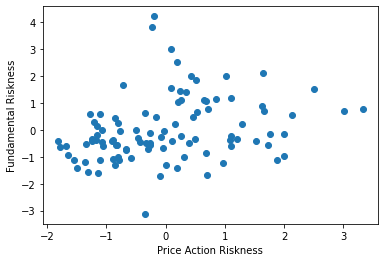

In [31]:
plt.scatter(df_reduced['PC1'], df_reduced['PC2'])
plt.xlabel('Price Action Riskness')
plt.ylabel('Fundamental Riskness')

plt.show()

### K-means clustering
We can now proceed to cluster this data, so that we can group the stocks into similar levels of risk. We start by using the K-Means approach.

#### Elbow method
Before proceeding to cluster the data, we have to use the elbow method in order to determine the optimal number of clusters for our K-means algorithm. The elbow method is a heuristic approach that consists of plotting the within-cluster sum of squares (WSS) against the number of clusters. The WSS is the sum of the squared distance between each point and the centroid of its assigned cluster. The idea is to choose the number of clusters at the point where the rate of decrease in WSS begins to level off. This point resembles an elbow in the plot, hence the name. By doing this, we can avoid choosing too few or too many clusters and find the sweet spot that balances simplicity and accuracy in our clustering algorithm.

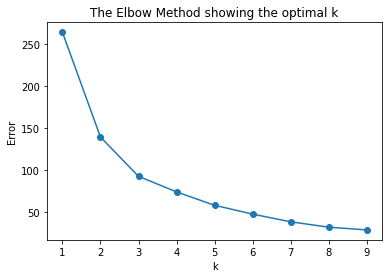

In [32]:
errors = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter = 1000, n_init = 10)
    kmeanModel.fit(df_reduced[["PC1", "PC2"]])
    errors.append(kmeanModel.inertia_)

plt.plot(K, errors, 'o-')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

  As we can see, the optimal value of k (the *elbow* of the plot) is 3.

In [33]:
k = 3

Let's use this value to perform k-means clustering on the reduced dataframe.

We then create a new column "Cluster (K-means)" which indicates, for each share, the cluster to which it belongs.

In [34]:
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_reduced[["PC1", "PC2"]])
df_reduced['Cluster (K-Means)'] = kmeans.labels_
centers = kmeans.cluster_centers_

df_reduced

,PC1,PC2,Cluster (K-Means)
Stock Name,,,
NFLX,1.999032,-0.976858,2
TSLA,3.326698,0.778546,2
COIN,2.129356,0.545645,2
NVDA,1.198771,-0.338534,2
META,1.876531,-1.112057,2
...,...,...,...
BNGO,0.261145,1.096776,0
NOK,-0.862146,-1.292863,1
CRON,-0.795873,0.243346,1


 Finally, we plotted the reduced dataset and clustering results in a scatterplot to visualize the relationship between the two principal components and the clustering of the stocks.

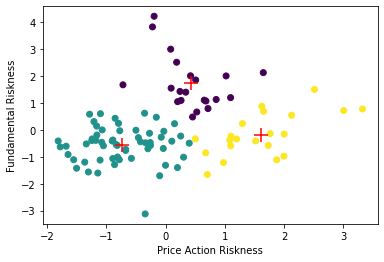

In [35]:
plt.scatter(df_reduced['PC1'], df_reduced['PC2'], c=df_reduced["Cluster (K-Means)"])

plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='+', s=200, alpha=1)
plt.xlabel('Price Action Riskness')
plt.ylabel('Fundamental Riskness')

plt.show()

### Hierarchical Clustering

Hierarchical clustering is a clustering algorithm that aims to group similar data points together based on their distances or similarities. It creates a hierarchy of clusters where the data points are progressively merged or split based on their similarity.

In hierarchical clustering, the number of clusters does not need to be specified in advance. However, to remain consistent with the other clustering and to be able to compare them more easily, we still set the number of clusters to 3.

In [36]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, linkage="ward")

df_reduced["Cluster (Hierarchical)"] = hierarchical_cluster.fit_predict(df_reduced[["PC1", "PC2"]])
df_reduced

,PC1,PC2,Cluster (K-Means),Cluster (Hierarchical)
Stock Name,,,,
NFLX,1.999032,-0.976858,2,2
TSLA,3.326698,0.778546,2,2
COIN,2.129356,0.545645,2,2
NVDA,1.198771,-0.338534,2,2
META,1.876531,-1.112057,2,2
...,...,...,...,...
BNGO,0.261145,1.096776,0,1
NOK,-0.862146,-1.292863,1,0
CRON,-0.795873,0.243346,1,0


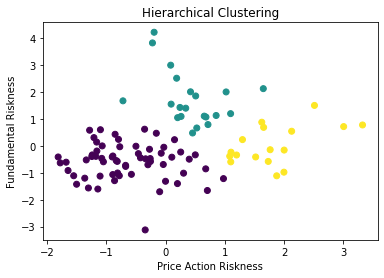

In [37]:
plt.scatter(df_reduced["PC1"], df_reduced["PC2"], c=df_reduced["Cluster (Hierarchical)"])
plt.xlabel('Price Action Riskness')
plt.ylabel('Fundamental Riskness')
plt.title("Hierarchical Clustering")
plt.show()

We can see that the resulting clusters are very similar to those obtained previously.

### Conclusions

We were able to identify three stock clusters with similar risk levels:
- Cluster on the left (green in the k-means graph): medium-low price action risk and medium-low fundamental risk.
- Central cluster (purple in the k-means graph): medium price-action risk and medium-high fundamental risk.
- Cluster on the right (yellow in the k-means graph): medium-high price-action risk and medium fundamental risk.

The use cases of such an analysis can be many. For example, an asset management / investment firm could use clustering of this type to propose different types of stock / ETF packages to clients with similar risk propension propensity. It could even be done clustering with the same objectives (identifying various levels of risk appetite) on customer data so that it can be matched with the most suitable actions for them.

## Part 2: Predictive Task